# Calcul des paramètres de polarimétrie #

Dans ce notebook, je vais calculer le vecteur de Stockes ainsi que l'AOP et le DOP pour des images polarimétriques au format 3 images RGB.



<Figure size 432x288 with 0 Axes>

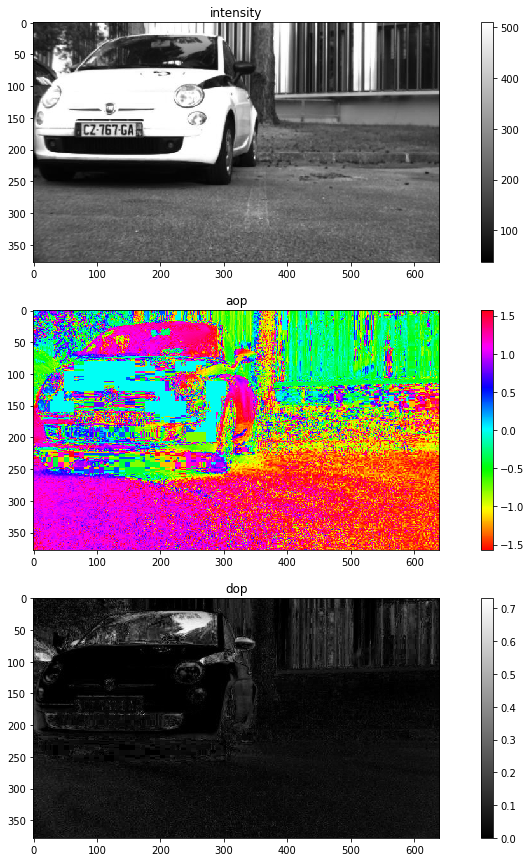

In [25]:
import numpy as np
import pylab as pl
import PIL 

# Calcul de la matrice P
def calcul_params_polarisation(imgs):
    H = mat_H()

    # Calcul des images de Stokes
    # img : liste d'images en format 2darrays
    
    s = stockes(imgs, H)
    
    # Calcul du degré de polarisation de l'image et de l'angle de polarisation de l'image
    
    degop = calcul_dop(s)
    anop = calcul_aop(s)
    
# Tracé de la figure représentant les images de Stokes
    
    pl.figure(1)
    pl.figure(figsize=(15,15))
    #pl.figure(figsize=(15, 45))
    pl.clf()
    pl.subplot(3,1,1)
    pl.imshow(s[0], cmap='gray')
    pl.title('intensity')
    pl.colorbar()
    pl.subplot(3,1,2)
    pl.imshow(anop, cmap='hsv')
    pl.title('aop')
    pl.colorbar()
    pl.subplot(3,1,3)
    degop[degop>1] = 1
    pl.imshow(degop, cmap='gray')
    pl.colorbar()
    pl.title('dop')

# Conversion d'une image en 2darray

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# Calcul des paramètres de Stockes 
def stockes(imgs, H): 
    s = [] # create an empty list
    for i in range(0,3):
        s.append(sum(H[i,j]*img for j, img in enumerate(imgs)))
    return s

def mat_H():
    P = {}
    P['theta'] = np.array([0, 45, 90]) *pl.pi/180
    P['T'] = np.array([0.5, 0.5, 0.5])
    P['P'] = np.array([1., 1., 1.])

    # Calcul de la matrice H, la matrice de calibration de polarisation en format 2darray

    M01s = P['T']
    M02s = np.cos(2*P['theta']) * P['T'] * P['P']
    M03s = np.sin(2*P['theta']) * P['T'] * P['P']
    Mt = np.array((M01s, M02s, M03s))
    H = pl.dot(pl.inv(pl.dot(Mt,Mt.T)), Mt)
    return H

def calcul_dop(s):
    dop = np.sqrt(s[1]**2+s[2]**2)/s[0] # Deg polarisation
    return dop

def calcul_aop(s):
    aop = 0.5*np.arctan2(s[2], s[1]) # Angle polarisation
    return aop
    
# Chargement des images à traiter :

im1 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00007/0.jpg'))
im2 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00007/45.jpg'))
im3 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00007/90.jpg'))

gray_im1 = rgb2gray(im1)
gray_im2 = rgb2gray(im2)
gray_im3 = rgb2gray(im3)

imgs2 = [gray_im1, gray_im2, gray_im3] # Images en niveaux de gris
imgs = [im1, im2, im3] # Images en rgb

calcul_params_polarisation(imgs2)

In [32]:
# Création d'une nouvelle image au format [s0, s1, s2] au lieu de RGB

import matplotlib as mpl

im_Stockes = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

H = mat_H()

s = stockes(imgs, H)

im_Stockes[:,:,0] = rgb2gray(s[0])
im_Stockes[:,:,1] = rgb2gray(s[1])
im_Stockes[:,:,2] = rgb2gray(s[2])

print(type(im_Stockes))

mpl.image.imsave("im1_Stockes.png", im_Stockes)

im_param_pola = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

anop = calcul_aop(s)
degop = calcul_dop(s)

im_param_pola[:,:,0] = rgb2gray(s[0])
im_param_pola[:,:,1] = rgb2gray(anop)
im_param_pola[:,:,2] = rgb2gray(degop)

mpl.image.imsave("im1_param_pola.png", im_param_pola)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'numpy.ndarray'>


In [ ]:
# Detection du contenu de l'image classique 

%run /Users/rblin/Downloads/keras-retinanet-master/examples/ResNet50RetinaNetTest.py